# Question 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# Load data
def load(path):
    return pd.read_csv(path,header=None)

# Compute Sigma
def sigma(x):
    return x.T@x/len(x)

# Solution for question b1
def solve_b1(w, s):
    print('------Solution for 1(b)1------')
    for i in [0, 1, 9, 29, 49]:
        print('lambda'+str(i+1)+': %.3f' % w[i])
    print('The sum of eigenvalues is: %.3f' % np.trace(s))
    
# Compute the fractional reconstruction error
def recon_error(w, s, k):
    trace = np.trace(s)
    errors = []
    error = 1
    
    for i in range(k):
        error -= w[i]/trace
        errors.append(error)
    
    return errors

# Plot the fractional reconstruction error versus k
def solve_b2(w, s, k):
    e = recon_error(w, s, k)
    print('------Solution for 1(b)2------')
    plt.figure()
    plt.plot(e, 'ro')
    plt.xlabel('k')
    plt.ylabel('fractional reconstruction error')
    plt.show()
    
# Plot the first 10 eigenvectors as images
def solve_c1(v, k):
    print('------Solution for 1(c)1------')
    plt.figure(figsize = (12,6))
    for i in range(k):
        plt.subplot(2, np.ceil(k/2), i+1)
        plt.imshow(np.reshape(np.real(v[:,i]),(84,96)).T,cmap='gray')
        plt.axis('off')    
    plt.show()

# Compute the projections of the image onto the top k eigenvectors
def recon_image(x, row, v, k):
    return np.reshape(np.real(x[row]@v[:,0:k]@v[:,0:k].T), (84,96)).T

# Plot the original and reconstruct images
def solve_d1(x, v):
    print('------Solution for 1(d)1------')
    rows = [0, 23, 64, 67, 256]
    ks = [1, 2, 5, 10, 50]
    
    plt.figure(figsize=(15,9))
    for i in range(len(rows)):
        row = rows[i]
        plt.subplot(5, 6, i*6+1)
        plt.imshow(np.reshape(x[row],(84,96)).T, vmin=0, vmax=1, cmap='gray')
        plt.axis('off') 
        for j in range(len(ks)):
            k = ks[j]
            plt.subplot(5, 6, i*6+j+2)
            plt.imshow(recon_image(x, row, v, k), vmin=0, vmax=1, cmap='gray')
            plt.axis('off') 
    plt.show()

------Solution for 1(b)1------
lambda1: 781.813
lambda2: 161.152
lambda10: 3.340
lambda30: 0.809
lambda50: 0.390
The sum of eigenvalues is: 1084.207
------Solution for 1(b)2------


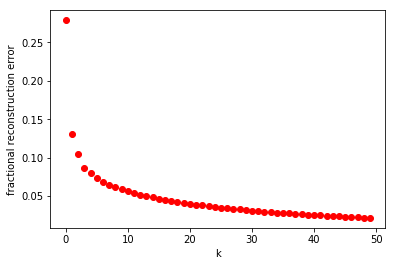

------Solution for 1(c)1------


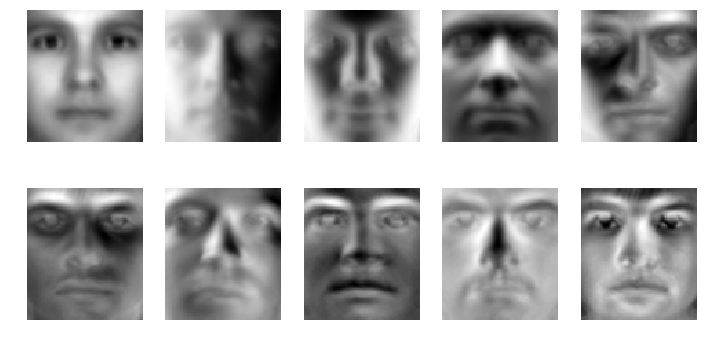

------Solution for 1(d)1------


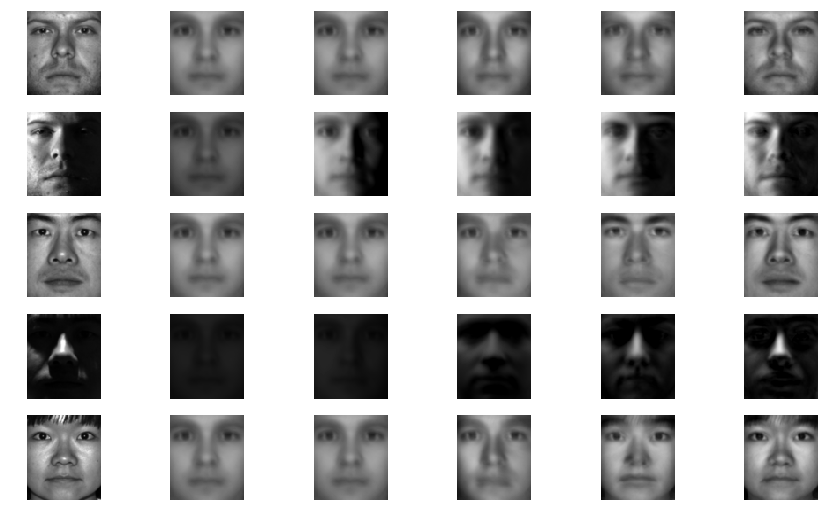

In [59]:
if __name__ == '__main__':
    X = load('data/faces.csv')
    Sigma = sigma(X)
    [w,v] = np.linalg.eig(Sigma)
    evalues = np.real(w)
    solve_b1(evalues, Sigma)
    solve_b2(evalues, Sigma, 50)
    solve_c1(v, 10)
    solve_d1(X.values, v)